# Initialize Environment

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [32]:
%matplotlib inline

# Load Data

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Image at 4553


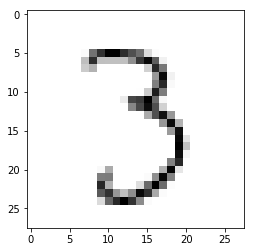

In [45]:
sample_pos = random.randint(1, x_train.shape[0])
print(f"Image at {sample_pos}")
plt.imshow(x_train[sample_pos - 1], cmap = plt.cm.binary)

# Normalize Data

Done using a BatchNormalization layer

# Define Model

In [33]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(28*28, use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Train Model

In [36]:
model.fit(x_train, y_train, epochs = 5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 34s 569us/sample - loss: 0.2336 - acc: 0.9295
Epoch 2/5
60000/60000 [==============================] - 35s 586us/sample - loss: 0.1174 - acc: 0.9643 - loss
Epoch 3/5
60000/60000 [==============================] - 35s 575us/sample - loss: 0.0899 - acc: 0.9726
Epoch 4/5
60000/60000 [==============================] - 34s 562us/sample - loss: 0.0724 - acc: 0.9777 - loss:
Epoch 5/5
60000/60000 [==============================] - 33s 553us/sample - loss: 0.0597 - acc: 0.9814


# Verify Model

In [37]:
val_loss, val_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 172us/sample - loss: 0.0670 - acc: 0.9781


# Use Model

In [39]:
predictions = model.predict([x_test])

In [41]:
print(np.argmax(predictions[0]))

7


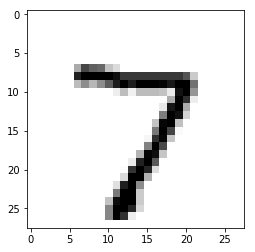

In [40]:
plt.imshow(x_test[0], cmap = plt.cm.binary)

# Save Model

In [42]:
model.save('tf_mnist_dnn.model')